In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_36047_R')

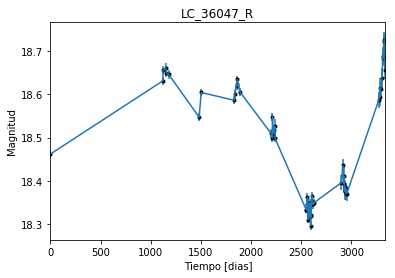

In [2]:
data = np.genfromtxt('LC_36047_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_36047_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

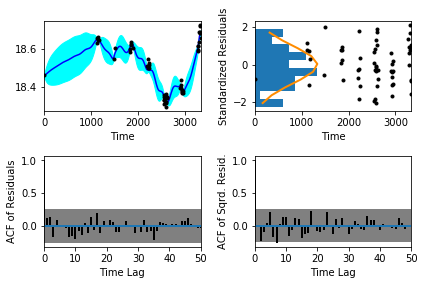

In [5]:
sample.assess_fit()

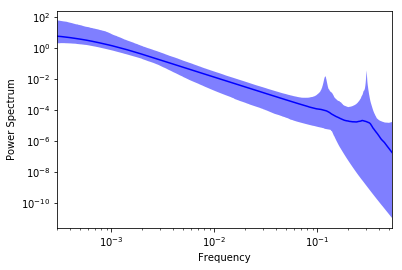

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_36047_R')

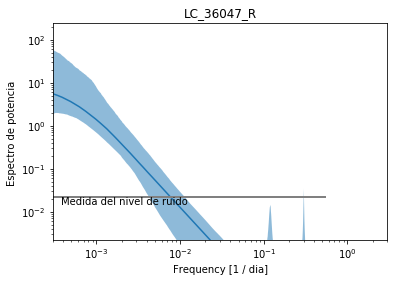

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_36047_R')

Text(0.5,1,'Prediccion , valor esperado LC_36047_R')

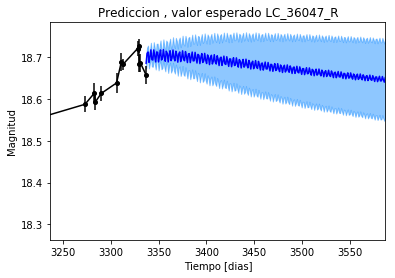

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_36047_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_36047_R')

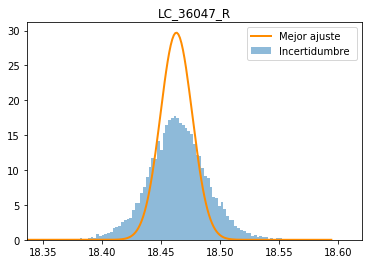

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_36047_R')

Text(0.5,1,'Interpolacion, camino simulado LC_36047_R')

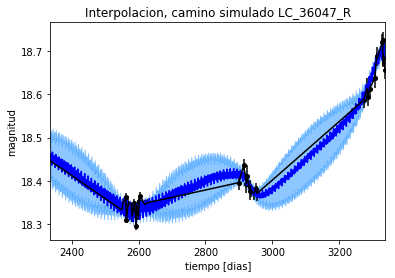

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_36047_R')

Text(0.5,1,'Interpolacion, camino simulado LC_36047_R')

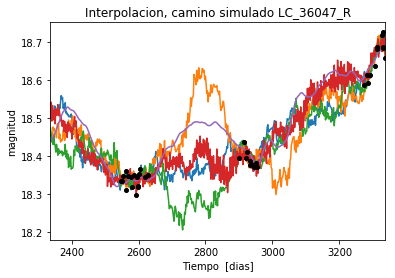

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_36047_R')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 442.825648438
Median: 0.00272446960026
Standard deviation: 0.0547124533829
68% credibility interval: [ 0.00071651  0.01112622]
95% credibility interval: [ 0.00033751  0.06032947]
99% credibility interval: [  3.08313757e-04   3.74168058e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 307.554392992
Median: 0.00264720530917
Standard deviation: 0.0438135488099
68% credibility interval: [ 0.00070304  0.01064544]
95% credibility interval: [ 0.00032833  0.04311412]
99% credibility interval: [  3.08313757e-04   3.11668245e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 60.3346190308
Median: 0.0894579086865
Standard deviatio

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 57.8944636102
Median: 152.709658002
Standard deviation: 3.19629506858
68% credibility interval: [ 149.46870912  155.45388255]
95% credibility interval: [ 144.35246585  157.45487365]
99% credibility interval: [ 141.54632189  158.40866753]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 55.9171873533
Median: 0.602235807219
Standard deviation: 1.90961300153
68% credibility interval: [ 0.06000911  3.47106498]
95% credibility interval: [ 0.01466692  6.35752601]
99% credibility interval: [ 0.01051372  8.85600077]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 77.4054658725
Median: 3.59411657572
Standard deviation: 9.64961297393
68% credibility interval: [  0.60219676  19.32095701]
95% credibility interval: [  0.5229103   

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 6422.37096743
Median: 1.50718733444e-14
Standard deviation: 8.6684953298e+101
68% credibility interval: [  1.39730718e-56   1.29038011e+01]
95% credibility interval: [  1.31381604e-101   5.18356058e+001]
99% credibility interval: [  1.98338576e-102   5.57119427e+073]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 329.71296472
Median: 18.5303974788
Standard deviation: 0.0531363357727
68% credibility interval: [ 18.48140073  18.57860083]
95% credibility interval: [ 18.42290587  18.63283176]
99% credibility interval: [ 18.37000231  18.68423759]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 53.0494845148
Median: 0.300851788028
Standard deviation: 0.234128029469
68% credibility interval: [ 0.12079613  0.69886584]
95% credibility interval: [ 0.11287386  0.88030988]
99% credibility interval: [ 0.          0.95821608]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 53.0494845148
Median: 0.300851788028
Standard deviation: 0.234128029469
68% credibility interval: [ 0.12079613  0.69886584]
95% credibility interval: [ 0.11287386  0.88030988]
99% credibility interval: [ 0.          0.95821608]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 76.2942399072
Median: 0.0
Standard deviation: 0.000261180753721
68% cred

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 57.8944636102
Median: 152.709658002
Standard deviation: 3.19629506858
68% credibility interval: [ 149.46870912  155.45388255]
95% credibility interval: [ 144.35246585  157.45487365]
99% credibility interval: [ 141.54632189  158.40866753]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 72.4408248953
Median: 0.0118022858453
Standard deviation: 0.0176258145139
68% credibility interval: [ 0.00812778  0.02012054]
95% credibility interval: [ 0.00581368  0.08307989]
99% credibility interval: [ 0.00494421  0.11251049]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 450.828156918
Median: 0.968373406051
Standard deviation: 0.216189536933
68% credibility interval: [ 0.80713357  1.19482083]
95% credibility interval: [ 0.68252614  1.5319294 ]
99% credibility interval: [ 0.59714208  1.86098262]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 183.809511114
Median: 0.00924481561125
Standard deviation: 0.233762122069
68% credibility interval: [ 0.00049788  0.17021624]
95% credibility interval: [  1.35581469e-04   7.88397535e-01]
99% credibility interval: [  7.17521468e-77   1.46477532e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 442.825648438
Median: (-0.0171183473622-1.32761867072j)
Standard deviation: 1.51070285335
68% credibility interval: [-0.06990812-0.71219029j -0.00450194-0.72666541j]
95% credibility interval: [-0.37906122-1.35459444j -0.00212062-0.75639711j]
99% credibility interval: [ -2.35096725e+00-2.52047854j  -1.93719247e-03-4.40708432j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 307.554392992
Median: (-0.0166328815037+1.38126477662j)
Standard deviation: 1.49660622067
68% credibility interval: [-0.06688727+0.73214215j -0.00441735+1.8903877j ]
95% credibility interval: [-0.27089401+1.59452153j -0.00206294+0.75318403j]
99% credibility interval: [ -1.95826934e+00+3.61827741j  -1.93719247e-03+4.40708432j]
Posterior summary for pa